In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.Container {width:85% !important;}
div.CodeMirror {font-family:나눔고딕; font-size:13pt; line-height : 150%;}
div.output_area pre {font-family:나눔고딕; font-size:13pt; line-height : 150%;}
div.output_wrapper pre {font-family:나눔고딕; font-size:13pt; line-height : 150%;}
div.input {font-family:나눔고딕; font-size:13pt; line-height : 150%;}
</style>
"""))

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['axes.unicode_minus'] = False

# 통합데이터로 분석해보기

In [5]:
df = pd.read_csv('D:/Gray_Bigdata/src/00_Projects/data/20_21_players/total_player_2021.csv',
                 encoding='UTF8').drop(['Unnamed: 0'],axis=1)

df.head(15)

,Player,age,position,Club,minutes_played_overall,minutes_played_home,minutes_played_away,nationality,appearances_overall,appearances_home,...,Off,Disp,UnsTch,Assists.1,KeyP.1,AvgP,PS%,Crosses,LongB,ThrB
0,Aaron Anthony Connolly,21.0,Forward,Brighton & Hove Albion,790.0,397.0,393.0,Republic of Ireland,17.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Aaron Cresswell,31.0,Defender,West Ham United,3172.0,1552.0,1620.0,England,36.0,18.0,...,0.0,0.3,0.4,8.0,1.6,45.9,78.9,1.6,3.3,0.0
2,Aaron Hickey,0.0,Midfielder,Bologna,763.0,364.0,399.0,Scotland,11.0,5.0,...,0.0,0.7,1.5,0.0,0.2,29.1,88.4,0.2,1.4,0.0
3,Aaron Kamardin,19.0,Defender,Olympique Marseille,0.0,0.0,0.0,France,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Aaron Leya Iseka,23.0,Forward,Metz,1010.0,609.0,401.0,Belgium,21.0,12.0,...,0.1,0.9,1.7,0.0,0.6,9.0,75.0,0.0,0.2,0.0
5,Aaron Ramsdale,23.0,Goalkeeper,Sheffield United,3420.0,1710.0,1710.0,England,38.0,19.0,...,0.0,0.0,0.1,0.0,0.1,26.8,43.4,0.0,7.4,0.0
6,Aaron Ramsey,30.0,Midfielder,Juventus,1093.0,572.0,521.0,Wales,22.0,12.0,...,0.1,0.4,1.4,4.0,1.4,31.8,87.1,0.5,1.5,0.0
7,Aaron Wan-Bissaka,23.0,Midfielder,Manchester United,3060.0,1530.0,1530.0,England,34.0,17.0,...,0.0,0.6,1.0,4.0,0.9,53.1,84.9,0.4,0.8,0.0
8,Aarón Escandell Banacloche,25.0,Goalkeeper,Granada CF,450.0,180.0,270.0,Spain,5.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Aarón Martín,24.0,Defender,Celta de Vigo,1539.0,668.0,871.0,Spain,19.0,9.0,...,0.2,0.4,0.7,3.0,0.3,35.4,82.3,0.2,1.1,0.0


In [5]:
df.drop(columns='age', inplace=True)

In [114]:
# 골라낼 열을 보기 위해 열 리스트 확인
df.columns

Index(['Player', 'position', 'Club', 'minutes_played_overall',
       'minutes_played_home', 'minutes_played_away', 'nationality',
       'appearances_overall', 'appearances_home', 'appearances_away',
       'goals_overall', 'goals_home', 'goals_away', 'assists_overall',
       'assists_home', 'assists_away', 'penalty_goals', 'penalty_misses',
       'clean_sheets_overall', 'clean_sheets_home', 'clean_sheets_away',
       'conceded_overall', 'conceded_home', 'conceded_away',
       'yellow_cards_overall', 'red_cards_overall',
       'goals_involved_per_90_overall', 'assists_per_90_overall',
       'goals_per_90_overall', 'goals_per_90_home', 'goals_per_90_away',
       'min_per_goal_overall', 'conceded_per_90_overall',
       'min_per_conceded_overall', 'min_per_match', 'min_per_card_overall',
       'min_per_assist_overall', 'cards_per_90_overall',
       'rank_in_league_top_attackers', 'rank_in_league_top_midfielders',
       'rank_in_league_top_defenders', 'rank_in_club_top_scorer',

## 효율적인 공격을 했던 선수는 누구였을까?
*  Mins: 총 경기 시간<br>
    Goals: 총 골 수<br>
    Assists: 총 도움 수<br>
    SpG: 경기당 슈팅 수<br>
    KeyP: 게임당 키패스 수<br>
    Drb: 게임당 드리블 수<br>
    Fouled: 게임당 당한 파울 수<br>
    Off: 경기당 오프사이드 범한 수<br>
    Disp: 게임 당 볼 소유권 잃은 횟수<br>
    UnsTch: 게임당 안좋은 볼 제어 횟수<br>

In [6]:
# 전체 데이터 중, 공격수만 추출하여 따로 데이터 생성
df_forward = df.loc[df['position'] == 'Forward'].reset_index(drop=True)

df_forward.head(10)

,Player,position,Club,minutes_played_overall,minutes_played_home,minutes_played_away,nationality,appearances_overall,appearances_home,appearances_away,...,Off,Disp,UnsTch,Assists.1,KeyP.1,AvgP,PS%,Crosses,LongB,ThrB
0,Aaron Anthony Connolly,Forward,Brighton & Hove Albion,790.0,397.0,393.0,Republic of Ireland,17.0,8.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Aaron Leya Iseka,Forward,Metz,1010.0,609.0,401.0,Belgium,21.0,12.0,9.0,...,0.1,0.9,1.7,0.0,0.6,9.0,75.0,0.0,0.2,0.0
2,Abdoulay Diaby,Forward,Getafe CF,17.0,0.0,17.0,Mali,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Abdoulaye Sidibe,Forward,Saint-Étienne,10.0,0.0,10.0,Mali,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Abdul Majeed Waris,Forward,Strasbourg,546.0,155.0,391.0,Ghana,15.0,7.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Aboubakar Kamara,Forward,Dijon,560.0,243.0,317.0,France,10.0,5.0,5.0,...,0.1,1.6,1.8,0.0,0.7,13.3,73.7,0.5,0.4,0.0
6,Aboubakar Kamara,Forward,Fulham,312.0,208.0,104.0,France,11.0,7.0,4.0,...,0.0,0.7,1.2,0.0,0.5,10.2,75.9,0.1,0.4,0.0
7,Adama Traore,Forward,Metz,0.0,0.0,0.0,Mali,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Ademola Lookman,Forward,Fulham,2756.0,1412.0,1344.0,England,34.0,16.0,18.0,...,0.4,2.1,3.1,4.0,1.8,30.9,80.9,0.9,0.6,0.1
9,Ademola Lookman,Forward,RB Leipzig,0.0,0.0,0.0,England,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# 포지션에 적합한 스탯만 확인하기 위해 열 추출
df_forward = df_forward.loc[ : , ['Player', 'Club', 'nationality', 'minutes_played_overall', 'appearances_overall', 'Goals', 'SpG',
                                  'Drb', 'Disp', 'UnsTch']]

df_forward.head()

,Player,Club,nationality,minutes_played_overall,appearances_overall,Goals,SpG,Drb,Disp,UnsTch
0,Aaron Anthony Connolly,Brighton & Hove Albion,Republic of Ireland,790.0,17.0,0.0,0.0,0.0,0.0,0.0
1,Aaron Leya Iseka,Metz,Belgium,1010.0,21.0,4.0,1.0,0.5,0.9,1.7
2,Abdoulay Diaby,Getafe CF,Mali,17.0,1.0,0.0,0.0,0.0,0.0,0.0
3,Abdoulaye Sidibe,Saint-Étienne,Mali,10.0,1.0,0.0,0.0,0.0,0.0,0.0
4,Abdul Majeed Waris,Strasbourg,Ghana,546.0,15.0,0.0,0.0,0.0,0.0,0.0


In [8]:
df_forward.rename(columns={'nationality' : 'Nation', 'minutes_played_overall' : 'Minutes',
                           'appearances_overall' : 'Apps', 'Drb' : 'Drib',
                           'Disp' : 'Lostball', 'UnsTch' : 'BadTch'}, inplace=True)

In [9]:
# 경기 당 슈팅 수 (SpG)와 경기당 골수(Goals / apps)로 산점도 그려보기
GoalspG = round(df_forward['Goals'] / df_forward['Apps'], 2)

In [10]:
df_forward['GoalspG'] = GoalspG
df_forward.sort_values(by='GoalspG', ascending=False, inplace=True)

In [11]:
df_forward = df_forward.reset_index(drop=True).head(50)

df_forward

,Player,Club,Nation,Minutes,Apps,Goals,SpG,Drib,Lostball,BadTch,GoalspG
0,Robert Lewandowski,Bayern München,Poland,2463.0,29.0,41.0,4.7,0.8,1.5,2.4,1.41
1,Cristiano Ronaldo,Juventus,Portugal,2803.0,33.0,29.0,5.1,1.8,1.0,1.9,0.88
2,André Silva,Eintracht Frankfurt,Portugal,2771.0,32.0,28.0,3.7,0.8,1.5,2.7,0.88
3,Kylian Mbappé,PSG,France,2389.0,31.0,27.0,3.4,2.9,1.5,2.6,0.87
4,Lionel Messi,FC Barcelona,Argentina,3022.0,35.0,30.0,5.6,4.5,2.5,1.6,0.86
5,Gerard Moreno,Villarreal,Spain,2682.0,33.0,23.0,2.9,2.2,1.8,2.8,0.70
6,Karim Benzema,Real Madrid,France,2902.0,34.0,23.0,3.6,1.1,1.1,1.7,0.68
7,Romelu Lukaku,Inter Milan,Belgium,2887.0,36.0,24.0,2.7,1.5,1.4,2.6,0.67
8,Harry Kane,Tottenham Hotspur,England,3087.0,35.0,23.0,3.9,0.5,1.5,1.8,0.66
9,Luis Suárez,Atlético Madrid,Uruguay,2521.0,32.0,21.0,3.3,0.4,0.8,1.9,0.66


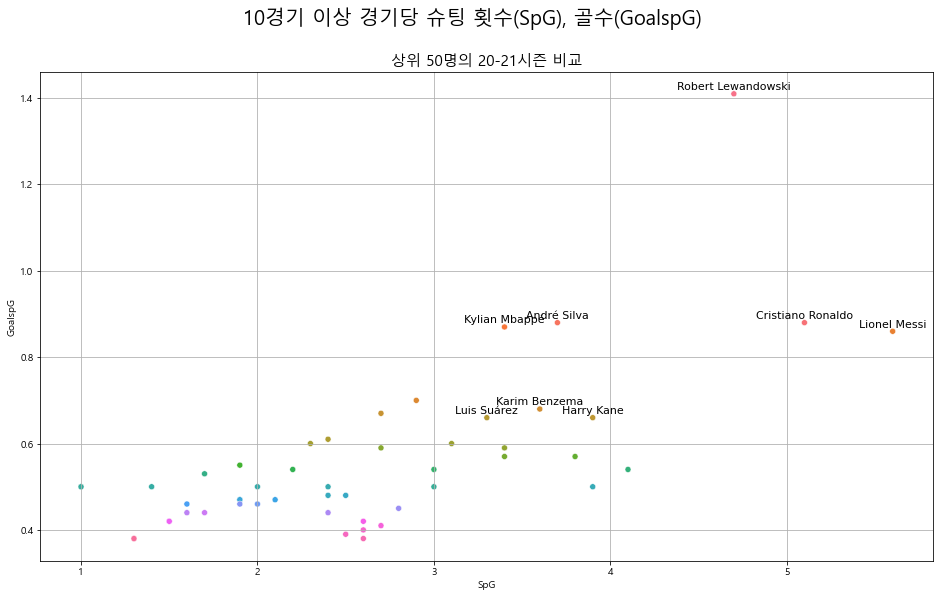

In [18]:
plt.figure(figsize=(16, 9))
sns.scatterplot(data = df_forward, x = 'SpG', y = 'GoalspG', hue = 'Player', legend = False)
plt.suptitle('10경기 이상 경기당 슈팅 횟수(SpG), 골수(GoalspG)', fontsize = 20)
plt.title('상위 50명의 20-21시즌 비교', fontsize = 15)
plt.rcParams['font.family'] = 'Nanum Gothic'
# plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

for n in range(0, 40): 
    if (df_forward['SpG'][n] > 3.0) & (df_forward['GoalspG'][n] > 0.6):
        plt.text(df_forward['SpG'][n], df_forward['GoalspG'][n]+0.005,
             df_forward['Player'][n], fontsize=11, verticalalignment='bottom' , horizontalalignment='center')
    
plt.grid()
plt.show()

In [132]:
# 분석 2. 게임당 안좋은 볼컨트롤 대비 볼 소유권 잃은 횟수
df_forward.sort_values(by='BadTch', ascending=False, inplace=True)

In [133]:
df_forward = df_forward.reset_index(drop=True)

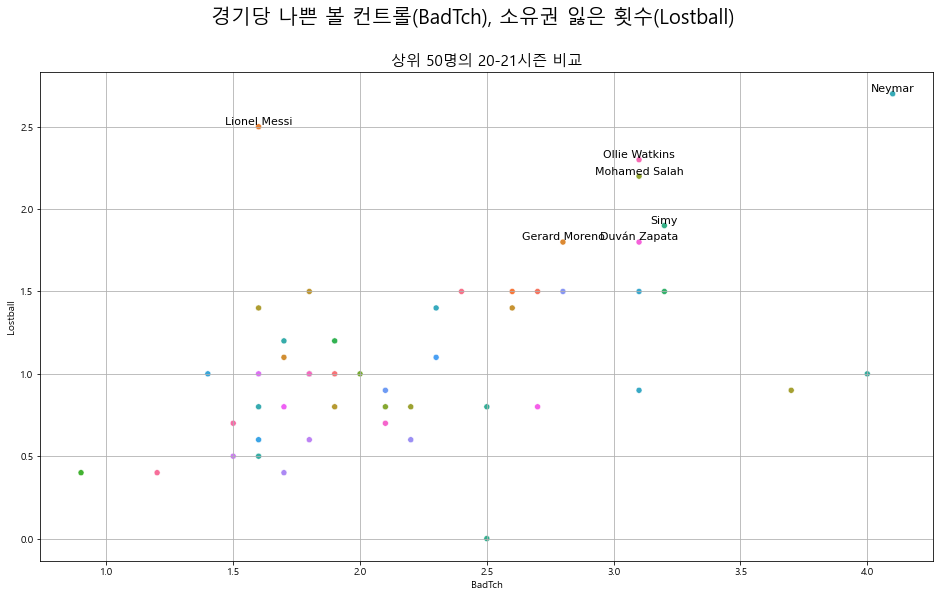

In [20]:
plt.figure(figsize=(16, 9))
a = sns.scatterplot(data = df_forward, x = 'BadTch', y = 'Lostball', hue = 'Player', legend = False)
plt.suptitle('경기당 나쁜 볼 컨트롤(BadTch), 소유권 잃은 횟수(Lostball)', fontsize = 20)
plt.title('상위 50명의 20-21시즌 비교', fontsize = 15)
plt.rcParams['font.family'] = 'Nanum Gothic'
# plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

for n in range(0, 50): 
    if (df_forward['BadTch'][n] > 1.5) & (df_forward['Lostball'][n] >1.5):
        plt.text(df_forward['BadTch'][n], df_forward['Lostball'][n],
             df_forward['Player'][n], fontsize=11, verticalalignment='bottom' , horizontalalignment='center')
    
plt.grid()
plt.show()

## 번뜩이는 기회를 만든 미드필더는 누굴까?
*  Mins:  총 출장시간 <br>
    Assists: 전체 도움 <br>
    KeyP: 게임당 키패스 수 <br>
    AvgP: 게임당 패스 횟수 <br>
    PS%: 패스 성공률 <br>
    Crosses: 게임 당 크로스 횟수 <br>
    LongB: 게임 당 롱볼 횟수 <br>
    ThrB: 상대팀 선수에게 공을 넘겨준 횟수

In [72]:
df.columns

Index(['Player', 'age', 'position', 'Current Club', 'minutes_played_overall',
       'minutes_played_home', 'minutes_played_away', 'nationality',
       'appearances_overall', 'appearances_home', 'appearances_away',
       'goals_overall', 'goals_home', 'goals_away', 'assists_overall',
       'assists_home', 'assists_away', 'penalty_goals', 'penalty_misses',
       'clean_sheets_overall', 'clean_sheets_home', 'clean_sheets_away',
       'conceded_overall', 'conceded_home', 'conceded_away',
       'yellow_cards_overall', 'red_cards_overall',
       'goals_involved_per_90_overall', 'assists_per_90_overall',
       'goals_per_90_overall', 'goals_per_90_home', 'goals_per_90_away',
       'min_per_goal_overall', 'conceded_per_90_overall',
       'min_per_conceded_overall', 'min_per_match', 'min_per_card_overall',
       'min_per_assist_overall', 'cards_per_90_overall',
       'rank_in_league_top_attackers', 'rank_in_league_top_midfielders',
       'rank_in_league_top_defenders', 'rank_in_cl

In [45]:
df_midfielder = df.loc[df['position'] == 'Midfielder']

df_midfielder.head()

,Player,position,Club,minutes_played_overall,minutes_played_home,minutes_played_away,nationality,appearances_overall,appearances_home,appearances_away,...,Off,Disp,UnsTch,Assists.1,KeyP.1,AvgP,PS%,Crosses,LongB,ThrB
2,Aaron Hickey,Midfielder,Bologna,763.0,364.0,399.0,Scotland,11.0,5.0,6.0,...,0.0,0.7,1.5,0.0,0.2,29.1,88.4,0.2,1.4,0.0
6,Aaron Ramsey,Midfielder,Juventus,1093.0,572.0,521.0,Wales,22.0,12.0,10.0,...,0.1,0.4,1.4,4.0,1.4,31.8,87.1,0.5,1.5,0.0
7,Aaron Wan-Bissaka,Midfielder,Manchester United,3060.0,1530.0,1530.0,England,34.0,17.0,17.0,...,0.0,0.6,1.0,4.0,0.9,53.1,84.9,0.4,0.8,0.0
11,Abdallah Basit,Midfielder,Benevento,0.0,0.0,0.0,Italy,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,Abdoulaye Doucouré,Midfielder,Everton,2452.0,1211.0,1241.0,France,29.0,14.0,15.0,...,0.0,0.9,1.2,3.0,0.7,46.2,85.1,0.0,1.3,0.1


In [46]:
df_midfielder = df_midfielder.loc[ : , ['Player', 'Club', 'minutes_played_overall', 'appearances_overall', 'Assists',
                                        'KeyP', 'AvgP', 'PS%', 'ThrB', 'Drb.1', 'Tackles', 'yellow_cards_overall', 
                                        'red_cards_overall']]

df_midfielder.head()

,Player,Club,minutes_played_overall,appearances_overall,Assists,KeyP,AvgP,PS%,ThrB,Drb.1,Tackles,yellow_cards_overall,red_cards_overall
2,Aaron Hickey,Bologna,763.0,11.0,0.0,0.2,29.1,88.4,0.0,NaN,1.1,4.0,1.0
6,Aaron Ramsey,Juventus,1093.0,22.0,4.0,1.4,31.8,87.1,0.0,NaN,1.0,2.0,0.0
7,Aaron Wan-Bissaka,Manchester United,3060.0,34.0,4.0,0.9,53.1,84.9,0.0,1.0,2.6,3.0,0.0
11,Abdallah Basit,Benevento,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0
19,Abdoulaye Doucouré,Everton,2452.0,29.0,3.0,0.7,46.2,85.1,0.1,0.7,1.8,6.0,0.0


In [47]:
df_midfielder.rename(columns={'minutes_played_overall' : 'Minutes', 'appearances_overall' : 'Apps',
                              'yellow_cards_overall' : 'Ycards', 'red_cards_overall' : 'Rcards'}, inplace=True)

In [192]:
# 전체 키패스 숫자 대비 도움 수

In [49]:
df_midfielder.sort_values(by='KeyP', ascending=False, inplace=True)

In [50]:
df_midfielder['Tot_KeyP'] = round(df_midfielder['Apps'] * df_midfielder['KeyP'])

In [51]:
df_midfielder = df_midfielder.head(50)

In [52]:
df_midfielder = df_midfielder.reset_index(drop=True)

df_midfielder.head(15)

,Player,Club,Minutes,Apps,Assists,KeyP,AvgP,PS%,ThrB,Drb.1,Tackles,Ycards,Rcards,Tot_KeyP
0,Kevin De Bruyne,Manchester City,2001.0,25.0,12.0,3.2,50.6,81.7,0.2,1.9,1.4,1.0,0.0,80.0
1,Jack Grealish,Aston Villa,2184.0,26.0,10.0,3.1,38.3,83.3,0.1,2.5,1.2,6.0,0.0,81.0
2,Ángel Di María,PSG,1863.0,27.0,9.0,2.6,36.8,81.2,0.3,NaN,1.0,1.0,0.0,70.0
3,Jadon Sancho,Borussia Dortmund,2069.0,26.0,11.0,2.6,50.2,82.4,0.2,NaN,0.7,0.0,0.0,68.0
4,Christopher Nkunku,RB Leipzig,1892.0,28.0,6.0,2.5,29.8,84.3,0.0,NaN,0.6,2.0,0.0,70.0
5,Luis Alberto,Lazio,2641.0,34.0,2.0,2.4,51.7,81.9,0.2,NaN,1.3,5.0,0.0,82.0
6,Toni Kroos,Real Madrid,2121.0,28.0,10.0,2.4,72.2,93.6,0.1,NaN,1.5,6.0,0.0,67.0
7,Mason Mount,Chelsea,2891.0,36.0,5.0,2.4,47.3,86.5,0.0,1.2,2.1,2.0,0.0,86.0
8,Joshua Kimmich,Bayern München,2197.0,27.0,10.0,2.4,71.0,88.3,0.2,NaN,1.5,4.0,0.0,65.0
9,Jonas Hofmann,Borussia M'gladbach,1824.0,24.0,11.0,2.4,36.3,80.3,0.0,NaN,1.1,1.0,0.0,58.0


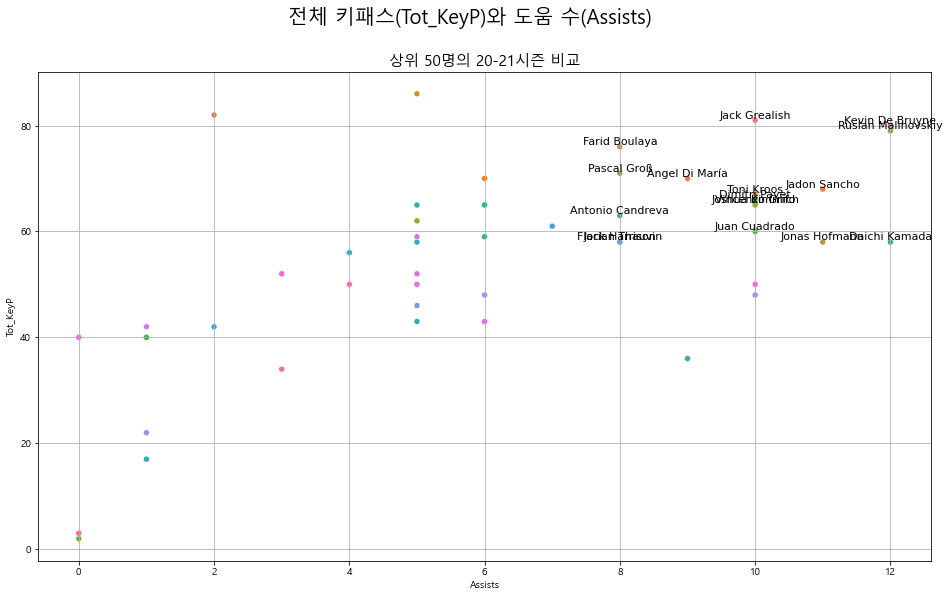

In [32]:
plt.figure(figsize=(16, 9))
sns.scatterplot(data = df_midfielder, x = 'Assists', y = 'Tot_KeyP', hue = 'Player', legend = False)
plt.title('상위 50명의 20-21시즌 비교', fontsize = 15)
plt.suptitle('전체 키패스(Tot_KeyP)와 도움 수(Assists)', fontsize = 20)
plt.rcParams['font.family'] = 'Nanum Gothic'
# plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

for n in range(0, len(df_midfielder)): 
    if (df_midfielder['Assists'][n] > 7.5) & (df_midfielder['Tot_KeyP'][n] > 50):
        plt.text(df_midfielder['Assists'][n], df_midfielder['Tot_KeyP'][n],
             df_midfielder['Player'][n], fontsize=11, verticalalignment='bottom' , horizontalalignment='center')
    
plt.grid()
plt.show()

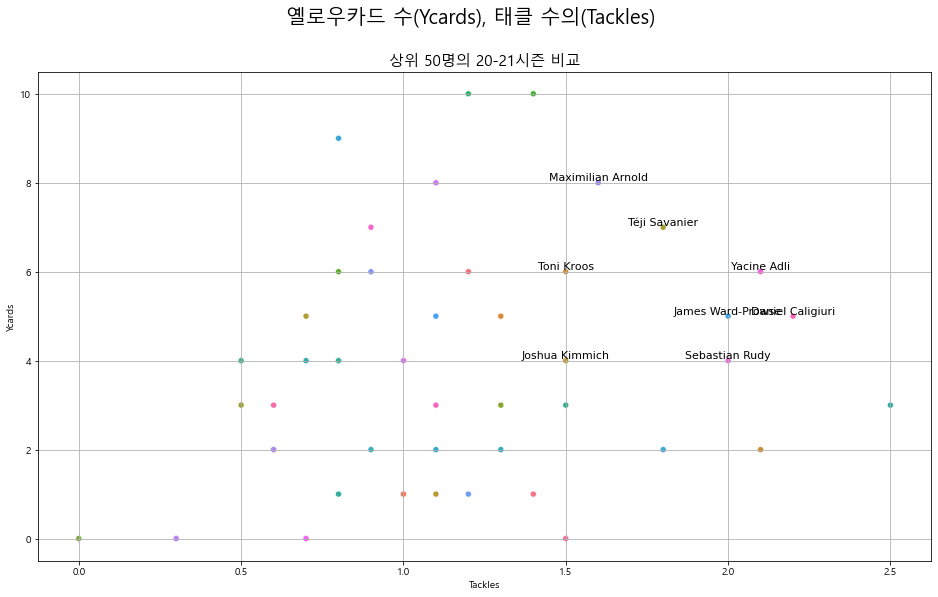

In [64]:
plt.figure(figsize=(16, 9))
sns.scatterplot(data = df_midfielder, x = 'Tackles', y = 'Ycards', hue = 'Player', legend = False)
plt.title('상위 50명의 20-21시즌 비교', fontsize = 15)
plt.suptitle('옐로우카드 수(Ycards), 태클 수의(Tackles)', fontsize = 20)
plt.rcParams['font.family'] = 'Nanum Gothic'
# plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

for n in range(0, len(df_midfielder)): 
    if (df_midfielder['Tackles'][n] > 1.4) & (df_midfielder['Ycards'][n] > 3.5):
        plt.text(df_midfielder['Tackles'][n], df_midfielder['Ycards'][n],
             df_midfielder['Player'][n], fontsize=11, verticalalignment='bottom' , horizontalalignment='center')
    
plt.grid()
plt.show()

## 철벽과 같은 수비수는 누구일까?
* Mins: Minutes played, 출장시간<br>
    Tackles: Tackles per game, 게임 당 태클<br>
    Inter: Interceptions per game, 게임 당 가로채기<br>
    Fouls: Fouls per game, 게임 당 파울<br>
    Offsides: Offside won per game, 게임 당 오프사이드 이긴 수<br>
    Clear: Clearances per game, 클리어링 횟수<br>
    Drb: Dribbled past per game, 게임 당 드리블<br>
    Blocks: Outfielder block per game, 골을 넣으려고 한 선수 가로막기<br>
    OwnG: Own goals 자책골 수

In [6]:
df_defender = df.loc[df['position'] == 'Defender']

df_defender.head()

,Player,age,position,Club,minutes_played_overall,minutes_played_home,minutes_played_away,nationality,appearances_overall,appearances_home,...,Off,Disp,UnsTch,Assists.1,KeyP.1,AvgP,PS%,Crosses,LongB,ThrB
1,Aaron Cresswell,31.0,Defender,West Ham United,3172.0,1552.0,1620.0,England,36.0,18.0,...,0.0,0.3,0.4,8.0,1.6,45.9,78.9,1.6,3.3,0.0
3,Aaron Kamardin,19.0,Defender,Olympique Marseille,0.0,0.0,0.0,France,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Aarón Martín,24.0,Defender,Celta de Vigo,1539.0,668.0,871.0,Spain,19.0,9.0,...,0.2,0.4,0.7,3.0,0.3,35.4,82.3,0.2,1.1,0.0
10,Aarón Martín,24.0,Defender,Mainz 05,261.0,94.0,167.0,Spain,5.0,2.0,...,0.0,0.4,0.6,0.0,0.6,22.6,73.5,0.8,1.4,0.0
12,Abdallahi Mohamed Mahmoud,21.0,Defender,Deportivo Alavés,66.0,0.0,66.0,Mauritania,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
df_defender = df_defender.loc[ : , ['Player', 'Club', 'minutes_played_overall', 'appearances_overall', 'Tackles',
                                        'Inter', 'Fouls', 'PS%', 'Clear', 'Blocks', 'yellow_cards_overall', 'red_cards_overall']]

df_defender.head()

,Player,Club,minutes_played_overall,appearances_overall,Tackles,Inter,Fouls,PS%,Clear,Blocks,yellow_cards_overall,red_cards_overall
1,Aaron Cresswell,West Ham United,3172.0,36.0,0.9,0.9,0.4,78.9,2.0,0.4,3.0,0.0
3,Aaron Kamardin,Olympique Marseille,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Aarón Martín,Celta de Vigo,1539.0,19.0,1.8,0.7,1.3,82.3,1.8,0.2,1.0,0.0
10,Aarón Martín,Mainz 05,261.0,5.0,0.6,0.4,0.8,73.5,0.4,0.0,0.0,0.0
12,Abdallahi Mohamed Mahmoud,Deportivo Alavés,66.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
df_defender.rename(columns={'minutes_played_overall' : 'Minutes', 'appearances_overall' : 'Apps',
                             'yellow_cards_overall' : 'Ycards', 'red_cards_overall' : 'Rcards'}, inplace=True)

In [9]:
df_defender.head(15)

,Player,Club,Minutes,Apps,Tackles,Inter,Fouls,PS%,Clear,Blocks,Ycards,Rcards
1,Aaron Cresswell,West Ham United,3172.0,36.0,0.9,0.9,0.4,78.9,2.0,0.4,3.0,0.0
3,Aaron Kamardin,Olympique Marseille,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Aarón Martín,Celta de Vigo,1539.0,19.0,1.8,0.7,1.3,82.3,1.8,0.2,1.0,0.0
10,Aarón Martín,Mainz 05,261.0,5.0,0.6,0.4,0.8,73.5,0.4,0.0,0.0,0.0
12,Abdallahi Mohamed Mahmoud,Deportivo Alavés,66.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,Abdelkabir Abqar,Deportivo Alavés,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,Abdou Diallo,PSG,1488.0,22.0,0.7,1.1,0.8,93.1,1.5,0.4,4.0,2.0
15,Abdoul Hate Bane,Parma,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,Abdoulaye Bakayoko,Saint-Étienne,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18,Abdoulaye Bamba,Angers SCO,1350.0,16.0,1.7,1.2,0.9,79.2,1.6,0.1,2.0,0.0


In [10]:
df_defender.sort_values(by='Tackles', ascending=False, inplace=True)

In [11]:
df_defender = df_defender.head(50)

In [12]:
df_defender = df_defender.reset_index(drop=True)

df_defender

,Player,Club,Minutes,Apps,Tackles,Inter,Fouls,PS%,Clear,Blocks,Ycards,Rcards
0,Tyrick Mitchell,Crystal Palace,1710.0,19.0,3.4,1.1,0.4,69.8,2.4,0.5,1.0,0.0
1,Bernardo,Brighton & Hove Albion,204.0,3.0,3.3,0.3,0.3,74.3,0.3,0.0,0.0,0.0
2,Max Lowe,Sheffield United,552.0,8.0,3.3,0.6,1.3,72.7,0.8,0.5,1.0,0.0
3,Davide Calabria,AC Milan,2652.0,32.0,3.2,1.2,1.0,79.2,2.2,0.3,7.0,0.0
4,Terence Kongolo,Fulham,90.0,1.0,3.0,2.0,1.0,81.8,2.0,0.0,0.0,0.0
5,Raúl Navas,CA Osasuna,169.0,2.0,3.0,1.5,1.0,74.1,6.0,0.0,0.0,0.0
6,Fabien Centonze,Metz,3222.0,36.0,2.9,3.1,1.2,79.5,3.1,0.5,9.0,0.0
7,Serge Aurier,Tottenham Hotspur,1609.0,19.0,2.9,1.0,1.2,80.8,2.2,0.3,0.0,0.0
8,Hiroki Sakai,Olympique Marseille,2386.0,29.0,2.8,1.9,1.4,82.6,1.9,0.2,7.0,1.0
9,Kyle Walker-Peters,Southampton,2649.0,30.0,2.8,1.3,1.1,80.9,1.7,0.3,4.0,0.0


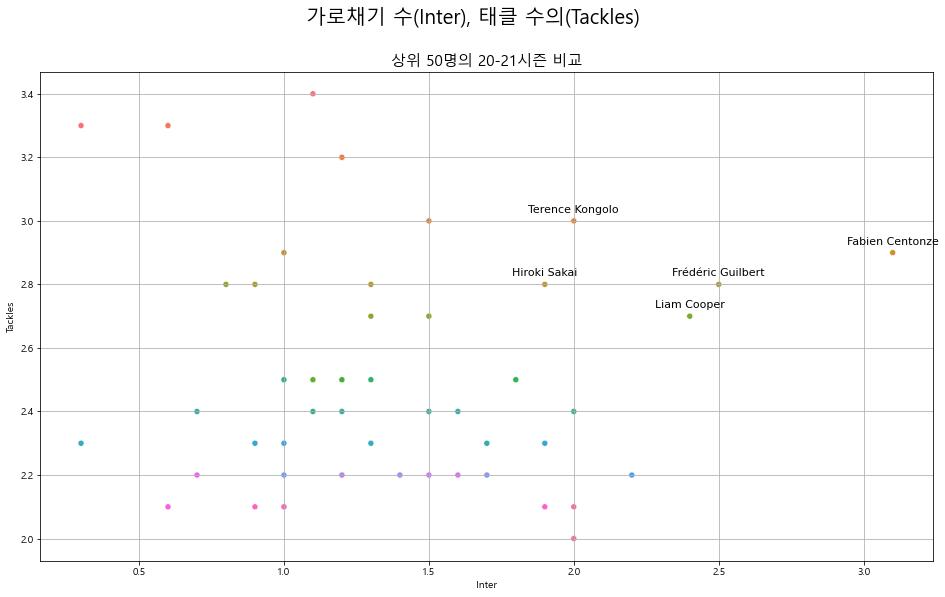

In [18]:
plt.figure(figsize=(16, 9))
sns.scatterplot(data = df_defender, x = 'Inter', y = 'Tackles', hue = 'Player', legend = False)
plt.title('상위 50명의 20-21시즌 비교', fontsize = 15)
plt.suptitle('가로채기 수(Inter), 태클 수의(Tackles)', fontsize = 20)
plt.rcParams['font.family'] = 'Nanum Gothic'
# plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

for n in range(0, len(df_defender)): 
    if (df_defender['Inter'][n] > 1.5) & (df_defender['Tackles'][n] > 2.6):
        plt.text(df_defender['Inter'][n], df_defender['Tackles'][n] + 0.02,
             df_defender['Player'][n], fontsize=11, verticalalignment='bottom' , horizontalalignment='center')
    
plt.grid()
plt.show()

## 포지션 비율, 국가 비율 확인해보기

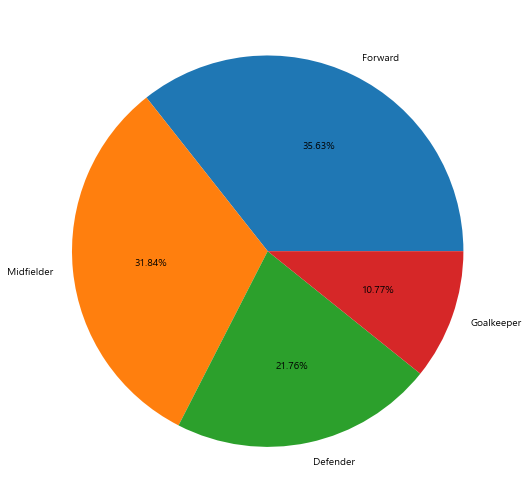

In [91]:
plt.figure(figsize=(16, 9))
plt.pie(x = df['position'].value_counts().to_list(), labels = ['Forward', 'Midfielder', 'Defender', 'Goalkeeper'], 
        autopct = lambda p : '{:.2f}%'.format(p))

plt.show()

In [23]:
df.sort_values(by='Tackles', ascending=False).head(15)

,Player,age,position,Club,minutes_played_overall,minutes_played_home,minutes_played_away,nationality,appearances_overall,appearances_home,...,Off,Disp,UnsTch,Assists.1,KeyP.1,AvgP,PS%,Crosses,LongB,ThrB
1863,Laurent Abergel,28.0,Midfielder,Lorient,2967.0,1499.0,1468.0,France,38.0,19.0,...,0.0,1.2,1.4,1.0,0.5,40.2,83.7,0.1,2.6,0.0
3306,Valentin Rongier,26.0,Midfielder,Olympique Marseille,1894.0,946.0,948.0,France,26.0,13.0,...,0.0,0.3,1.3,2.0,0.5,52.7,86.3,0.1,1.7,0.0
3285,Tyrick Mitchell,21.0,Defender,Crystal Palace,1710.0,810.0,900.0,England,19.0,9.0,...,0.0,0.6,0.8,1.0,0.2,31.5,69.8,0.3,1.5,0.0
940,Exequiel Palacios,22.0,Midfielder,Bayer Leverkusen,572.0,289.0,283.0,Argentina,9.0,4.0,...,0.0,1.2,1.0,0.0,0.9,45.6,86.6,0.1,1.9,0.0
2582,Oriol Romeu,29.0,Midfielder,Southampton,1767.0,950.0,817.0,Spain,21.0,11.0,...,0.0,0.9,1.1,1.0,0.7,60.7,82.6,0.1,1.8,0.0
2057,Mamadou Coulibaly,22.0,Midfielder,Udinese,183.0,93.0,90.0,Senegal,3.0,2.0,...,0.3,1.3,2.0,0.0,0.7,25.7,75.3,0.3,1.3,0.3
400,Bernardo,26.0,Defender,Brighton & Hove Albion,204.0,90.0,114.0,Brazil,3.0,1.0,...,0.0,1.3,0.3,0.0,0.7,24.7,74.3,0.3,0.7,0.0
2281,Max Lowe,24.0,Defender,Sheffield United,552.0,372.0,180.0,England,8.0,6.0,...,0.0,0.5,1.0,0.0,0.3,21.5,72.7,0.1,0.6,0.0
170,Allan,30.0,Midfielder,Everton,2052.0,990.0,1062.0,Brazil,24.0,11.0,...,0.0,0.8,0.9,0.0,0.7,44.0,85.6,0.0,2.4,0.0
384,Benjamin André,30.0,Midfielder,Lille,2903.0,1570.0,1333.0,France,35.0,19.0,...,0.0,1.1,1.1,1.0,0.6,57.7,84.1,0.1,2.3,0.0
